In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


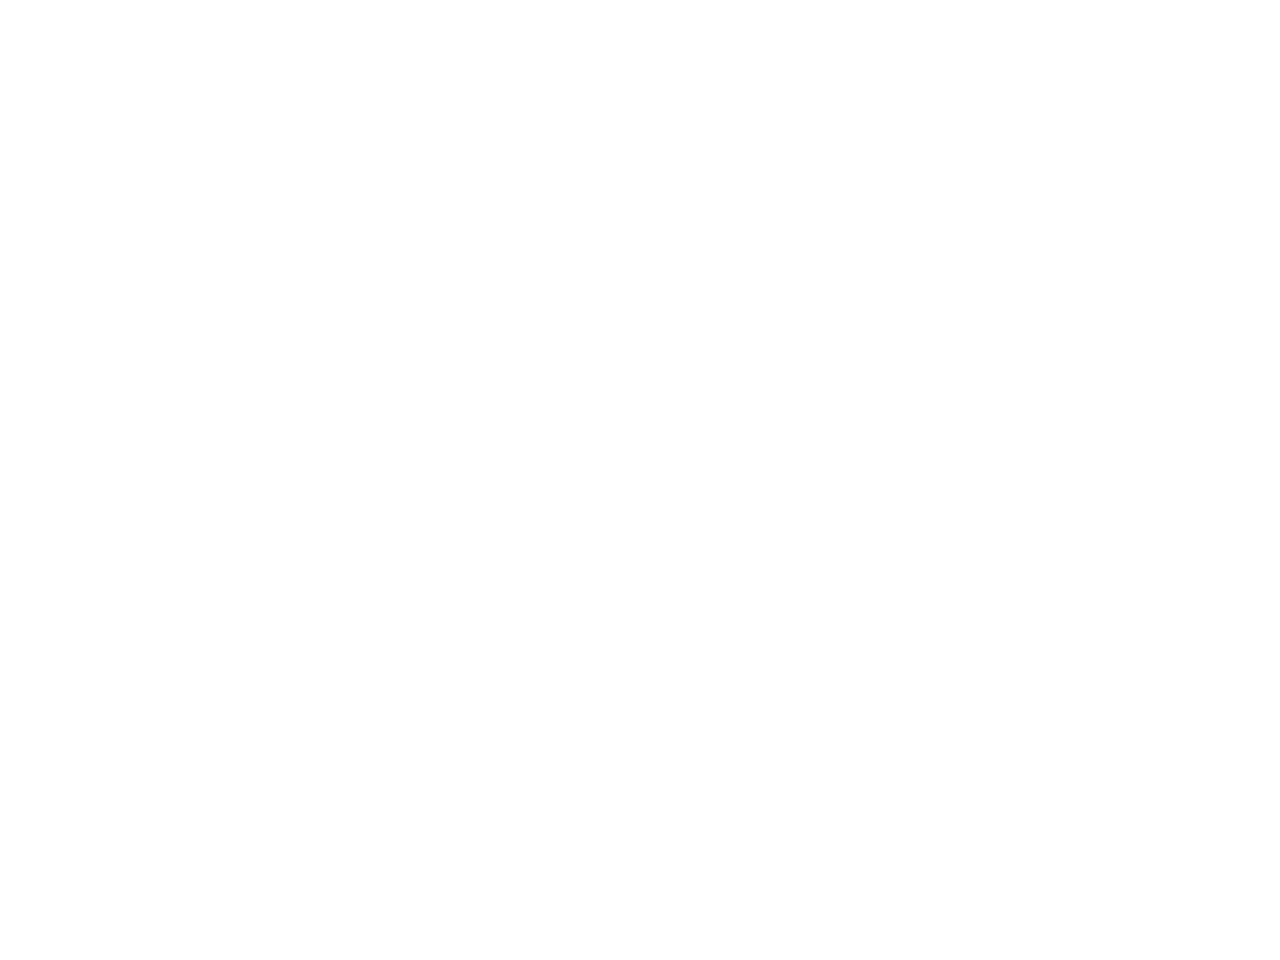

<AxesSubplot:xlabel='Wavelength (nm)'>

In [122]:

df = pd.read_csv("BH2_100uM.txt",skiprows=19,sep="\t",names=["Wavelength (nm)", "Ellipticity", "Voltage (V)"], index_col=0)

df.drop(columns="Voltage (V)",axis=1,inplace=True)
df.plot.line()

In [123]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

<IPython.core.display.Javascript object>


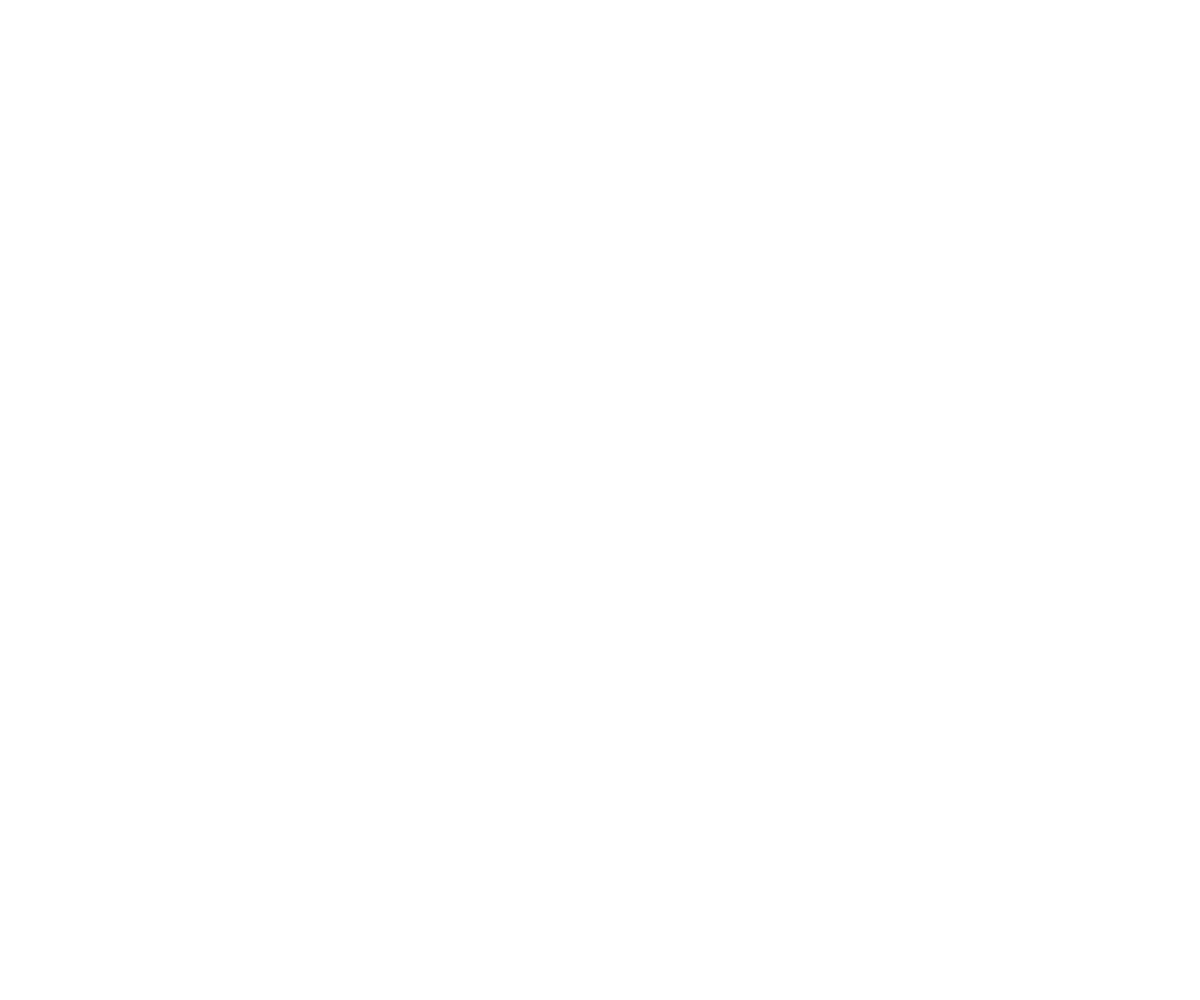

In [124]:
z = np.array([i-j for j in y for i in x])
Z = z.reshape(100, 100)
fig, ax = plt.subplots()
z_min, z_max = -np.abs(Z).max(), np.abs(Z).max()
c = ax.contourf(x, y, Z, 20,vmin=-20, vmax=20)
ax.set_title('ΔG')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel("ΔΗ (kJ/mol)")
ax.set_ylabel("TΔS (kJ/mol)")
fig.colorbar(c, ax=ax)
fig.set_size_inches(6, 5)
plt.show()
#plt.savefig('300K.png', dpi=150)

<IPython.core.display.Javascript object>


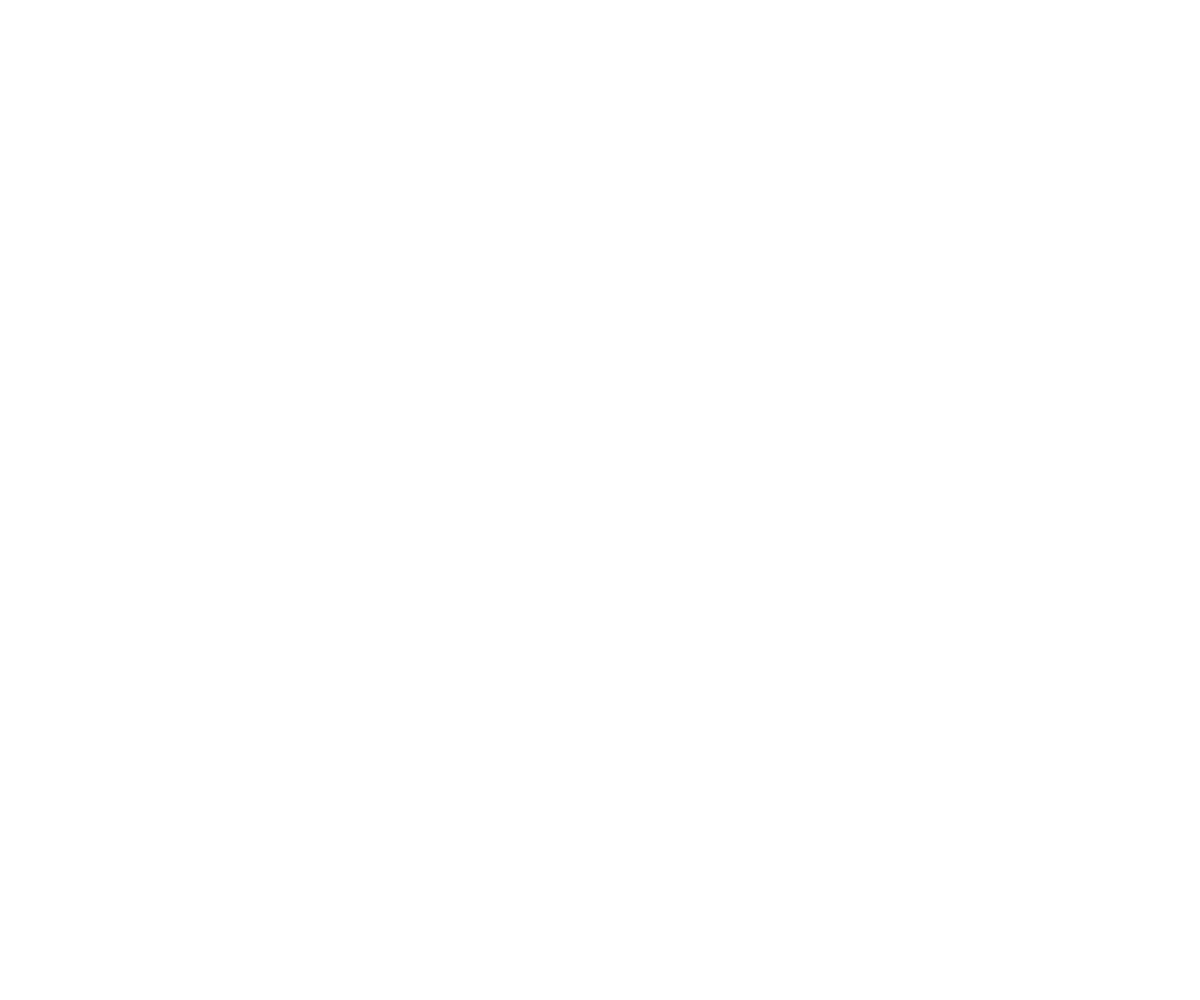

In [125]:
z = np.array([i-j for j in y for i in x])
Z = z.reshape(100, 100)
fig, ax = plt.subplots()
z_min, z_max = -np.abs(Z).max(), np.abs(Z).max()
c = ax.contourf(x, y, Z, 40,vmin=-20, vmax=20,cmap="RdYlGn_r")
ax.set_title('ΔG')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel("ΔΗ (kJ/mol)")
ax.set_ylabel("TΔS (kJ/mol)")
fig.colorbar(c, ax=ax)
fig.set_size_inches(6, 5)

#plt.savefig("dG2.png", dpi=300)
plt.show()

<IPython.core.display.Javascript object>


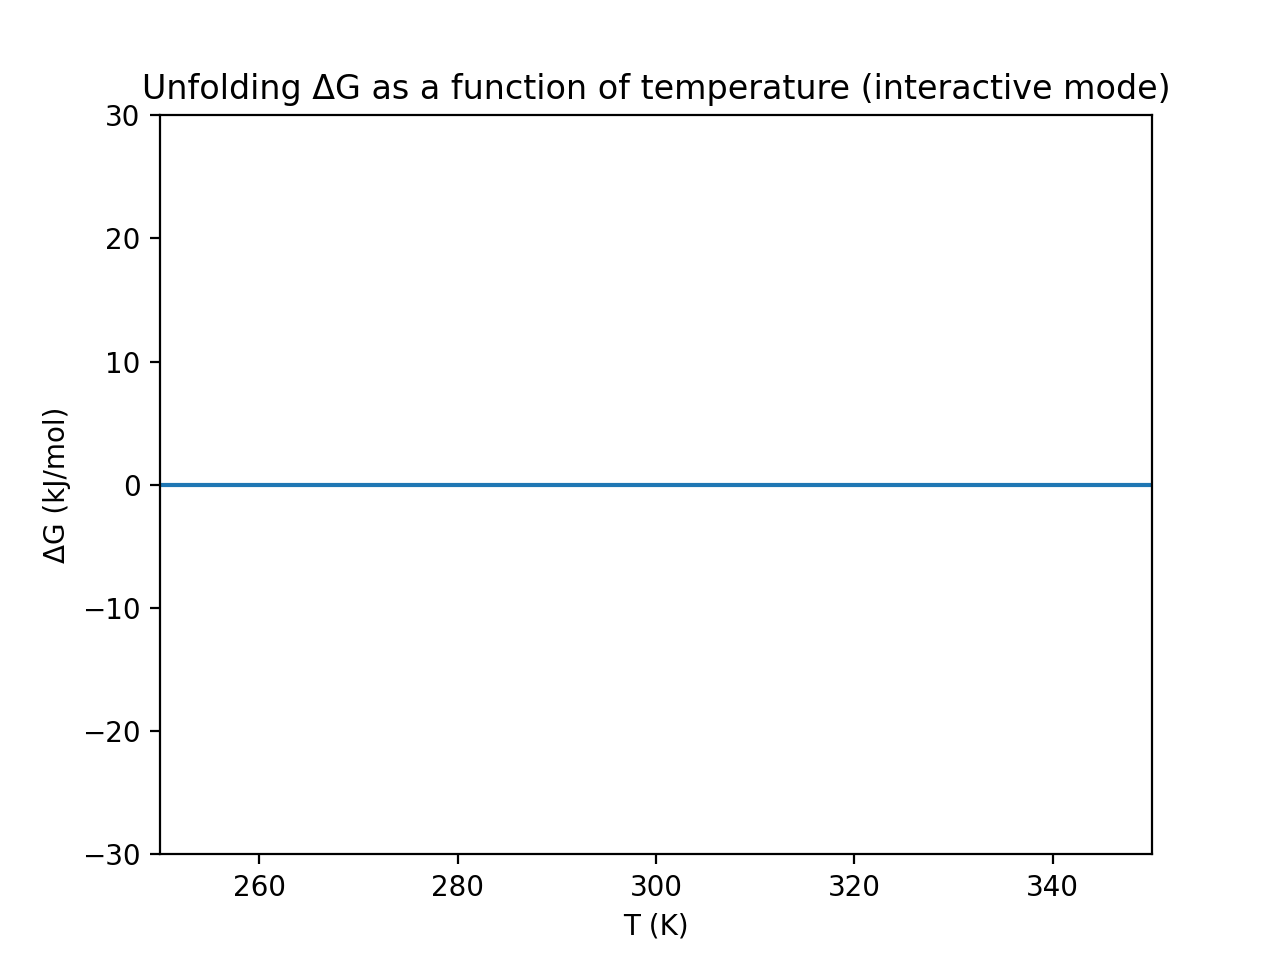

interactive(children=(FloatSlider(value=0.0, description='ΔH', max=20.0, min=-20.0, step=0.2), IntSlider(value…

<function __main__.update(ΔH=0, ΔS=0, ΔCp=0)>

In [145]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

#define T range with 100 points in between
T = np.linspace(250, 350, 100)

#define dG function, ΔH in kJ/mol, ΔS and ΔCp are in J/(mol.K)
def dG(T, ΔH, ΔS, ΔCp):
    return (ΔH*1000 + ΔCp*(T-298) - T*(ΔS + ΔCp*np.log(T/298)))/1000

#plot settings
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(T, dG(T, ΔH=0, ΔS=0, ΔCp=0))
ax.set_xlabel("T (K)")
ax.set_ylabel("ΔG (kJ/mol)")
ax.set_xlim(right=350,left=250)
ax.set_ylim(top=30,bottom=-30)
ax.set_title("Unfolding ΔG as a function of temperature (interactive mode)")

#Update function
def update(ΔH = 0, ΔS = 0, ΔCp = 0):
    line.set_ydata(dG(T,ΔH,ΔS,ΔCp))
    fig.canvas.draw_idle()
    
interact(update, ΔH = (-20,20,0.2), ΔS = (-300,300,2), ΔCp = (-2000,2000,5))
